### Preparation

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import time
import math
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv('../data/raw_data/new_properties_1.csv', engine='python', encoding='utf8', error_bad_lines=False)[:]



C:\Users\zzbri\AppData\Local\Temp\ipykernel_30216\41936929.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('../data/raw_data/new_properties_1.csv', engine='python', encoding='utf8', error_bad_lines=False)[:]


### Feature Extraction

In [8]:
if_AC = []
if_Ensuite = []
if_Furnished = []
if_Heating = []
if_SecureParking = []
if_ClosetoShops = []
if_ClosetoSchools = []
if_ClosetoTrans = []

for feature in df['features']:

    if 'Air conditioning' in feature:
        if_AC.append(1)
    else:
        if_AC.append(0)


    if 'Ensuite' in feature:
        if_Ensuite.append(1)
    else:
        if_Ensuite.append(0)


    if 'Furnished' in feature:
        if_Furnished.append(1)
    else:
        if_Furnished.append(0)


    if 'Heating' in feature:
        if_Heating.append(1)
    else:
        if_Heating.append(0)

    if 'Secure Parking' in feature:
        if_SecureParking.append(1)
    else:
        if_SecureParking.append(0)

    if 'Close to shops' in feature:
        if_ClosetoShops.append(1)
    else:
        if_ClosetoShops.append(0)

    if 'Close to schools' in feature:
        if_ClosetoSchools.append(1)
    else:
        if_ClosetoSchools.append(0)

    if 'Close to transport' in feature:
        if_ClosetoTrans.append(1)
    else:
        if_ClosetoTrans.append(0)

df_feature = {'if_AC': if_AC, 'if_Ensuite': if_Ensuite, 'if_Furnished': if_Furnished, 'if_Heating': if_Heating,  'if_SecureParking': if_SecureParking, 'if_ClosetoShops': if_ClosetoShops, 'if_ClosetoSchools': if_ClosetoSchools, 'if_ClosetoTrans': if_ClosetoTrans}
df_feature = pd.DataFrame(df_feature)

df = pd.concat([df, df_feature], axis=1)

df


,name,cost_text,coordinates,type,bond,features,unverified_features,desc,costs,beds,baths,parking,lon,lat,revcoord,dis_to_melCBD,school,park,supermarket,cinema,postalcode,if_AC,if_Ensuite,if_Furnished,if_Heating,if_SecureParking,if_ClosetoShops,if_ClosetoSchools,if_ClosetoTrans
0,8092Y/33 Rose Lane Melbourne VIC 3000,$60 per week,"[-37.8150137, 144.9538694]",Apartment / Unit / Flat,261.0,[],[],['. Close to Southern Cross Station. Available...,60.0,1,1,1,144.953869,-37.815014,"(144.9538694, -37.8150137)",1424,11,170,48,7,VIC 3000,0,0,0,0,0,0,0,0
1,602/118 Franklin Street Melbourne VIC 3000,$330,"[-37.8082052, 144.9589035]",Apartment / Unit / Flat,1320.0,[],[],['The exclusive address simply speaks for itse...,330.0,1,1,0,144.958903,-37.808205,"(144.9589035, -37.8082052)",1241,16,166,48,7,VIC 3000,0,0,0,0,0,0,0,0
2,1112/333-351 Exhibition Street Melbourne VIC 3000,$600 per week,"[-37.8078956, 144.9682873]",Apartment / Unit / Flat,2607.0,['Furnished'],[],['Positioned in this most favourable location ...,600.0,2,2,0,144.968287,-37.807896,"(144.9682873, -37.8078956)",1692,19,173,54,6,VIC 3000,0,0,1,0,0,0,0,0
3,3002/288 Spencer St Melbourne VIC 3000,$510,"[-37.813775, 144.9520948]",Apartment / Unit / Flat,2216.0,[],[],['This fantastic apartment located on the 30th...,510.0,2,1,1,144.952095,-37.813775,"(144.9520948, -37.813775)",1612,10,108,44,6,VIC 3000,0,0,0,0,0,0,0,0
4,4/180 Little Collins Street Melbourne VIC 3000,$500 per week,"[-37.8138601, 144.9679067]",Apartment / Unit / Flat,2173.0,['Furnished'],[],['Enjoy what the renowned reputation The Georg...,500.0,1,1,0,144.967907,-37.813860,"(144.9679067, -37.8138601)",627,13,146,49,7,VIC 3000,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15231,16B Sandy Mount Avenue Inverloch VIC 3996,$400.00 per week,"[-38.6340011, 145.725239]",House,1738.0,[],"['Built in wardrobes', 'Internal Laundry', 'Se...","[""This spacious, two bedroom townhouse is perf...",400.0,2,1,1,145.725239,-38.634001,"(145.725239, -38.6340011)",0,0,0,0,0,VIC 3996,0,0,0,0,0,0,0,0
15232,28 Beachcomber Drive Inverloch VIC 3996,$550 wk,"[-38.6412502, 145.7031282]",House,2390.0,[],"['Gas', 'Internal Laundry', 'Secure Parking', ...","[""The popular Beachcomber estate offers you mo...",550.0,4,2,0,145.703128,-38.641250,"(145.7031282, -38.6412502)",0,0,0,0,0,VIC 3996,0,0,0,0,0,0,0,0
15233,14 Inverloch Parade Inverloch VIC 3996,$420 wk,"[-38.6287143, 145.7358082]",House,1820.0,"['Garden', 'Split System AC', 'Floorboards']","['Internal Laundry', 'Heating']","['This two bedroom, 1 bathroom home will surel...",420.0,2,1,0,145.735808,-38.628714,"(145.7358082, -38.6287143)",0,0,0,0,0,VIC 3996,0,0,0,0,0,0,0,0
15234,Inverloch VIC 3996,$475 wk,"[-38.6314613, 145.7293638]",House,2065.0,"['Ensuite', 'Garden', 'Split System AC', 'Outd...",['Heating'],"[""Neat 3 bedroom home located in the immaculat...",475.0,3,2,1,145.729364,-38.631461,"(145.7293638, -38.6314613)",0,0,0,0,0,VIC 3996,0,1,0,0,0,0,0,0


### calculate distance to MEL city center

In [9]:
from geopy import distance

# print(geodesic((30.28708,120.12802999999997), (28.7427,115.86572000000001)).m) #计算两个坐标直线距离
dis_to_center = []
for i in range(df.shape[0]):
    lon = df['lon'][i]
    lat = df['lat'][i]
    dis = distance.distance((lon-90,lat), (144.9618789-90,-37.8152834)).m
    dis_to_center.append(dis)

df_dis_to_center = pd.DataFrame({'dis_to_center':dis_to_center})

df = pd.concat([df, df_dis_to_center], axis=1)

df
    

c:\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


,name,cost_text,coordinates,type,bond,features,unverified_features,desc,costs,beds,baths,parking,lon,lat,revcoord,dis_to_melCBD,school,park,supermarket,cinema,postalcode,if_AC,if_Ensuite,if_Furnished,if_Heating,if_SecureParking,if_ClosetoShops,if_ClosetoSchools,if_ClosetoTrans,dis_to_center
0,8092Y/33 Rose Lane Melbourne VIC 3000,$60 per week,"[-37.8150137, 144.9538694]",Apartment / Unit / Flat,261.0,[],[],['. Close to Southern Cross Station. Available...,60.0,1,1,1,144.953869,-37.815014,"(144.9538694, -37.8150137)",1424,11,170,48,7,VIC 3000,0,0,0,0,0,0,0,0,891.806975
1,602/118 Franklin Street Melbourne VIC 3000,$330,"[-37.8082052, 144.9589035]",Apartment / Unit / Flat,1320.0,[],[],['The exclusive address simply speaks for itse...,330.0,1,1,0,144.958903,-37.808205,"(144.9589035, -37.8082052)",1241,16,166,48,7,VIC 3000,0,0,0,0,0,0,0,0,561.509803
2,1112/333-351 Exhibition Street Melbourne VIC 3000,$600 per week,"[-37.8078956, 144.9682873]",Apartment / Unit / Flat,2607.0,['Furnished'],[],['Positioned in this most favourable location ...,600.0,2,2,0,144.968287,-37.807896,"(144.9682873, -37.8078956)",1692,19,173,54,6,VIC 3000,0,0,1,0,0,0,0,0,856.064894
3,3002/288 Spencer St Melbourne VIC 3000,$510,"[-37.813775, 144.9520948]",Apartment / Unit / Flat,2216.0,[],[],['This fantastic apartment located on the 30th...,510.0,2,1,1,144.952095,-37.813775,"(144.9520948, -37.813775)",1612,10,108,44,6,VIC 3000,0,0,0,0,0,0,0,0,1093.470938
4,4/180 Little Collins Street Melbourne VIC 3000,$500 per week,"[-37.8138601, 144.9679067]",Apartment / Unit / Flat,2173.0,['Furnished'],[],['Enjoy what the renowned reputation The Georg...,500.0,1,1,0,144.967907,-37.813860,"(144.9679067, -37.8138601)",627,13,146,49,7,VIC 3000,0,0,1,0,0,0,0,0,677.196148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15231,16B Sandy Mount Avenue Inverloch VIC 3996,$400.00 per week,"[-38.6340011, 145.725239]",House,1738.0,[],"['Built in wardrobes', 'Internal Laundry', 'Se...","[""This spacious, two bedroom townhouse is perf...",400.0,2,1,1,145.725239,-38.634001,"(145.725239, -38.6340011)",0,0,0,0,0,VIC 3996,0,0,0,0,0,0,0,0,99600.792587
15232,28 Beachcomber Drive Inverloch VIC 3996,$550 wk,"[-38.6412502, 145.7031282]",House,2390.0,[],"['Gas', 'Internal Laundry', 'Secure Parking', ...","[""The popular Beachcomber estate offers you mo...",550.0,4,2,0,145.703128,-38.641250,"(145.7031282, -38.6412502)",0,0,0,0,0,VIC 3996,0,0,0,0,0,0,0,0,97762.418097
15233,14 Inverloch Parade Inverloch VIC 3996,$420 wk,"[-38.6287143, 145.7358082]",House,1820.0,"['Garden', 'Split System AC', 'Floorboards']","['Internal Laundry', 'Heating']","['This two bedroom, 1 bathroom home will surel...",420.0,2,1,0,145.735808,-38.628714,"(145.7358082, -38.6287143)",0,0,0,0,0,VIC 3996,0,0,0,0,0,0,0,0,100430.401675
15234,Inverloch VIC 3996,$475 wk,"[-38.6314613, 145.7293638]",House,2065.0,"['Ensuite', 'Garden', 'Split System AC', 'Outd...",['Heating'],"[""Neat 3 bedroom home located in the immaculat...",475.0,3,2,1,145.729364,-38.631461,"(145.7293638, -38.6314613)",0,0,0,0,0,VIC 3996,0,1,0,0,0,0,0,0,99907.915696


In [10]:
def get_postalcode(name):
    return name[-8:].strip('VIC')
df['postalcode'] = df.name.apply(get_postalcode)  # extract postalcode from name

In [29]:
df_vic3000 = df[:] # Take first 100 apartments as examples which are all from VIC 3000

### EDA & Feature Engineering

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


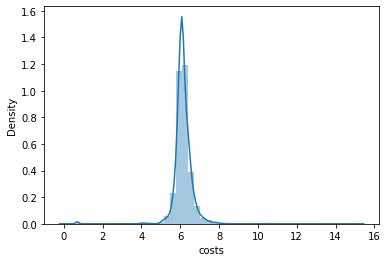

In [30]:
df_vic3000['bond'] = df_vic3000['bond'].transform(lambda x: x.fillna(x.median()))
df_vic3000['costs'] = df_vic3000['costs'].transform(lambda x: x.fillna(x.median())) 

df_vic3000['costs']= np.log(df_vic3000.costs)

sns.distplot(df_vic3000['costs'])
plt.show()

In [31]:
df_vic3000.columns

Index(['name', 'cost_text', 'coordinates', 'type', 'bond', 'features',
       'unverified_features', 'desc', 'costs', 'beds', 'baths', 'parking',
       'lon', 'lat', 'revcoord', 'dis_to_melCBD', 'school', 'park',
       'supermarket', 'cinema', 'postalcode', 'if_AC', 'if_Ensuite',
       'if_Furnished', 'if_Heating', 'if_SecureParking', 'if_ClosetoShops',
       'if_ClosetoSchools', 'if_ClosetoTrans', 'dis_to_center'],
      dtype='object')

In [51]:
# df_vic3000.drop(['type','bond','name','dis_to_melCBD','school','park','cinema','cost_text','coordinates','features','unverified_features','desc','lon','lat','revcoord','if_ClosetoSchools','if_SecureParking','supermarket'],axis=1,inplace=True)
df_vic =  df_vic3000.loc[:,['postalcode','costs','dis_to_center']]
dd = df_vic.groupby(["postalcode"], as_index=False).agg('mean')
dd = dd[:429]
dd['postalcode']=dd['postalcode'].astype(int)
dd

,postalcode,costs,dis_to_center
0,3000,6.240889,677.891621
1,3002,6.499560,2422.988951
2,3003,6.253442,1423.525756
3,3004,6.449519,2307.101712
4,3006,6.351464,777.521690
...,...,...,...
424,3984,6.082569,69262.979907
425,3987,6.309918,82537.403374
426,3992,6.048687,80461.483959
427,3995,5.935865,86401.853473


In [87]:
df_pop = pd.read_csv('../data/curated_data/pop_postcode.csv', engine='python', encoding='utf8', error_bad_lines=False).loc[:,['postcode','rate']]
df_pop = df_pop.rename(columns={'postcode':'postalcode'})
df_pop['postalcode']=df_pop['postalcode'].astype(int)
df_pop = df_pop.groupby(["postalcode"], as_index=False).agg('mean')




df_comfort = pd.merge(dd,df_pop,on='postalcode',how='inner')
df_comfort


C:\Users\zzbri\AppData\Local\Temp\ipykernel_30216\40612322.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_pop = pd.read_csv('../data/curated_data/pop_postcode.csv', engine='python', encoding='utf8', error_bad_lines=False).loc[:,['postcode','rate']]


,postalcode,costs,dis_to_center,rate
0,3000,6.240889,677.891621,2267.140260
1,3002,6.499560,2422.988951,73.027273
2,3003,6.253442,1423.525756,0.101299
3,3004,6.449519,2307.101712,404.910390
4,3006,6.351464,777.521690,634.516234
...,...,...,...,...
424,3984,6.082569,69262.979907,365.308192
425,3987,6.309918,82537.403374,95.462338
426,3992,6.048687,80461.483959,434.538961
427,3995,5.935865,86401.853473,434.538961


c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


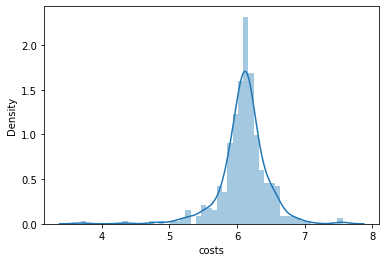

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


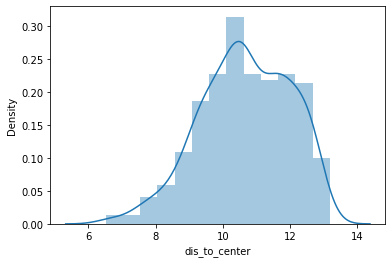

c:\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


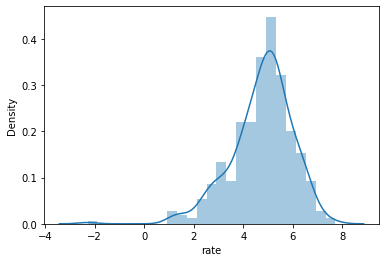

In [88]:
sns.distplot(df_comfort['costs'])
plt.show()

df_comfort['dis_to_center']= np.log(df_comfort.dis_to_center)
sns.distplot(df_comfort['dis_to_center'])
plt.show()

df_comfort['rate']= np.log(df_comfort.rate)
sns.distplot(df_comfort['rate'])
plt.show()

In [89]:

df_comfort['rate'] = 1/df_comfort['rate']
df_comfort['rate'] = df_comfort['rate'].transform(lambda x: x.fillna(x.median())) 
df_comfort

,postalcode,costs,dis_to_center,rate
0,3000,6.240889,6.518987,0.129428
1,3002,6.499560,7.792757,0.233055
2,3003,6.253442,7.260892,-0.436742
3,3004,6.449519,7.743747,0.166565
4,3006,6.351464,6.656112,0.154970
...,...,...,...,...
424,3984,6.082569,11.145666,0.169470
425,3987,6.309918,11.321007,0.219359
426,3992,6.048687,11.295534,0.164628
427,3995,5.935865,11.366764,0.164628


In [91]:
# lower score, higer comfort
df_comfort['comfort_score'] = df_comfort['costs'] + df_comfort['dis_to_center'] + df_comfort['rate']*50
df_comfort

,postalcode,costs,dis_to_center,rate,comfort_score
0,3000,6.240889,6.518987,0.129428,19.231301
1,3002,6.499560,7.792757,0.233055,25.945067
2,3003,6.253442,7.260892,-0.436742,-8.322762
3,3004,6.449519,7.743747,0.166565,22.521511
4,3006,6.351464,6.656112,0.154970,20.756074
...,...,...,...,...,...
424,3984,6.082569,11.145666,0.169470,25.701747
425,3987,6.309918,11.321007,0.219359,28.598888
426,3992,6.048687,11.295534,0.164628,25.575641
427,3995,5.935865,11.366764,0.164628,25.534050


In [95]:
df_comfort_rank = df_comfort.sort_values(by='comfort_score',axis=0,ascending=True, inplace=False, na_position='last')
df_comfort_rank[1:11]

,postalcode,costs,dis_to_center,rate,comfort_score
0,3000,6.240889,6.518987,0.129428,19.231301
4,3006,6.351464,6.656112,0.154970,20.756074
43,3053,6.160859,6.865061,0.156749,20.863372
41,3051,6.190345,7.409287,0.151151,21.157194
5,3008,6.293531,7.603581,0.148642,21.329197
150,3182,6.216689,8.240774,0.161128,22.513870
3,3004,6.449519,7.743747,0.166565,22.521511
324,3750,5.809840,9.568275,0.143270,22.541626
46,3056,6.263620,8.079403,0.164810,22.583532
94,3121,6.345228,8.415605,0.159058,22.713725
